In [1]:
# import dependencies and wrappers
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import openweathermapy.core as owm
from config import api_key
import random
from citipy import citipy
from urllib.error import HTTPError

In [2]:
# create empty lists for latitude and longitude
lat = []
lng = []

# use random integers to populate the lat and lng lists
for x in range (1500):
    y = round(random.uniform(-90,90), 6)
    lat.append(y)
    z = round(random.uniform(-180,180),6)
    lng.append(z)
    
# zip the lat and lng lists together to create a list of coordinates
coords = list(zip(lat, lng))

In [3]:
# create empty list for cities
cities = []

# find the nearest city for each 
for coord in coords:
    lat, lng = coord
    nearest_city = citipy.nearest_city(lat, lng)
    if nearest_city not in cities:
        cities.append (nearest_city)

# find the city name and country code for each city
city_names = []
country_codes = []
for city in cities:
    country_code = city.country_code
    country_codes.append(country_code)
    name = city.city_name
    city_names.append(name)
    
len(city_names)

619

In [4]:
# create dataframe and add columns to be later populated
city_df = pd.DataFrame({"City": city_names, "Country Code": country_codes})
city_df["Latitude"]= ""
city_df["Longitude"] = ""
city_df["Temperature"] = ""
city_df["Humidity"] = ""
city_df["Cloudiness"] = ""
city_df["Wind Speed"] = ""

city_df.head()

,City,Country Code,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,noumea,nc,,,,,,
1,gigmoto,ph,,,,,,
2,isangel,vu,,,,,,
3,nizhniy odes,ru,,,,,,
4,katsuura,jp,,,,,,


In [5]:
# set parameters for owm wrapper
settings = {"units": "imperial", "appid": api_key}
base_url = "api.openweathermap.org/data/2.5/weather?"

# iterate through rows of dataframe, populating it with data from owm api
# add in exception handling in case city from citipy does not appear in owm
for index, row in city_df.iterrows():
    city = row['City']
    try:
        city_weather = owm.get_current(city, **settings)
        city_df.loc[index, 'Latitude'] = city_weather['coord']['lat']
        city_df.loc[index, 'Longitude'] = city_weather['coord']['lon']
        city_df.loc[index, 'Temperature'] = city_weather['main']['temp']
        city_df.loc[index, 'Humidity'] = city_weather['main']['humidity']
        city_df.loc[index, 'Cloudiness'] = city_weather['clouds']['all']
        city_df.loc[index, 'Wind Speed'] = city_weather['wind']['speed']
    except HTTPError:
        print(f"{city} not found. Skipping...")

marcona not found. Skipping...
belushya guba not found. Skipping...
barbar not found. Skipping...
jiddah not found. Skipping...
safaga not found. Skipping...
forset not found. Skipping...
hihifo not found. Skipping...
saleaula not found. Skipping...
illoqqortoormiut not found. Skipping...
joniskelis not found. Skipping...
ho not found. Skipping...
taolanaro not found. Skipping...
chagda not found. Skipping...
bengkulu not found. Skipping...
barentsburg not found. Skipping...
umzimvubu not found. Skipping...
kashi not found. Skipping...
hendijan not found. Skipping...
ye not found. Skipping...
tumannyy not found. Skipping...
saryshagan not found. Skipping...
tabiauea not found. Skipping...
svetlyy not found. Skipping...
mys shmidta not found. Skipping...
uniao da victoria not found. Skipping...
warqla not found. Skipping...
karaul not found. Skipping...
sentyabrskiy not found. Skipping...
tubruq not found. Skipping...
kazalinsk not found. Skipping...
karkaralinsk not found. Skipping...


## Populated City Dataframe

In [6]:
city_df['Latitude'].replace('', np.nan, inplace=True)
city_df.dropna(axis = 0, how = 'any', inplace = True)
city_df.reset_index(drop = True, inplace = True)
city_df.index = np.arange(1, len(city_df) + 1)
city_df.to_csv('city_df.csv', index = None, header = True)
city_df.head()

,City,Country Code,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
1,noumea,nc,-22.28,166.46,80.6,74,75,8.05
2,gigmoto,ph,13.78,124.39,74.92,100,48,12.24
3,isangel,vu,-19.55,169.27,81.27,100,36,11.56
4,nizhniy odes,ru,63.64,54.86,16.87,78,88,9.22
5,katsuura,jp,33.93,134.5,41,75,75,8.05


In [7]:
for index, row in city_df.iterrows():
    city = row["City"]
    print(f'City #{index}: {city}')
    print(f'url: {base_url}units=Imperial&APPID={api_key}&q={city}')

City #1: nome
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc5537c6b7d0589778e430c&q=nome
City #2: tuatapere
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc5537c6b7d0589778e430c&q=tuatapere
City #3: albany
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc5537c6b7d0589778e430c&q=albany
City #4: provideniya
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc5537c6b7d0589778e430c&q=provideniya
City #5: macusani
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc5537c6b7d0589778e430c&q=macusani
City #6: arraial do cabo
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc5537c6b7d0589778e430c&q=arraial do cabo
City #7: carnarvon
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc5537c6b7d0589778e430c&q=carnarvon
City #8: yining
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640c

City #427: vagay
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc5537c6b7d0589778e430c&q=vagay
City #428: manono
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc5537c6b7d0589778e430c&q=manono
City #429: channel-port aux basques
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc5537c6b7d0589778e430c&q=channel-port aux basques
City #430: daigo
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc5537c6b7d0589778e430c&q=daigo
City #431: namie
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc5537c6b7d0589778e430c&q=namie
City #432: umm lajj
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc5537c6b7d0589778e430c&q=umm lajj
City #433: karratha
url: api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4f71f9640cc5537c6b7d0589778e430c&q=karratha
City #434: iskateley
url: api.openweathermap.org/data/2.5/weather?units=Imperial

## Latitude vs Temperature Scatter Plot

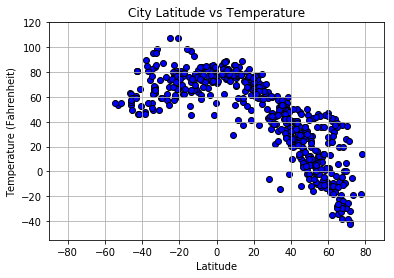

In [10]:
# create scatter plot from dataframe, add appropriate labels and limits, save figure
plt.scatter(city_df["Latitude"], city_df["Temperature"], facecolors = "blue", edgecolors = "black")
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (Fahrenheit)")
plt.grid()
plt.xlim(-90,90)
plt.ylim(-55,120)
plt.savefig("lat_temp.png", bbox_inches = "tight")

## Latitude vs Humidity Scatter Plot

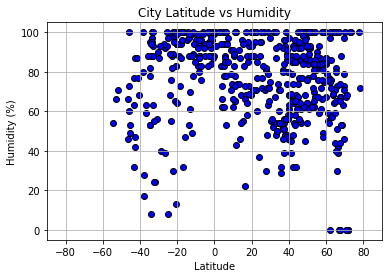

In [11]:
# create scatter plot from dataframe, add appropriate labels and limits, save figure
plt.scatter(city_df["Latitude"], city_df["Humidity"], facecolors = "blue", edgecolors = "black")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.xlim(-90,90)
plt.ylim(-5,105)
plt.savefig("lat_hmdty.png", bbox_inches = "tight")

## Latitude vs Cloudiness Scatter Plot

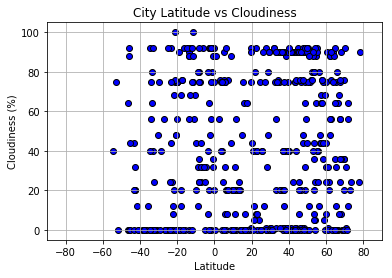

In [12]:
# create scatter plot from dataframe, add appropriate labels and limits, save figure
plt.scatter(city_df["Latitude"], city_df["Cloudiness"], facecolors = "blue", edgecolors = "black")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.xlim(-90,90)
plt.ylim(-5,105)
plt.savefig("lat_cloud.png", bbox_inches = "tight")

## Latitude vs Wind Speed Scatter Plot

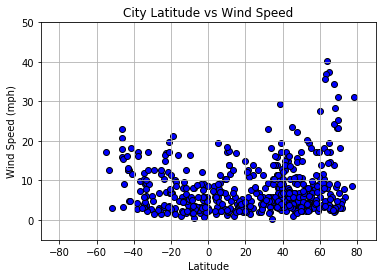

In [13]:
# create scatter plot from dataframe, add appropriate labels and limits, save figure
plt.scatter(city_df["Latitude"], city_df["Wind Speed"], facecolors = "blue", edgecolors = "black")
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.xlim(-90,90)
plt.ylim(-5,50)
plt.savefig("lat_wind.png", bbox_inches = "tight")